In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [3]:
"""
-Build classifier to determine whether we might like a song based on its attributes.
"""
train_df = pd.read_csv('data/spotify.csv',)

In [4]:
train_df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:

train_df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [7]:
X = train_df.drop(['Unnamed: 0','target','song_title','artist'], axis=1)
y = train_df['target']

In [8]:
"""
split data into train/test split
-take a certain amount of training data, build an alogorithm in order to predcit whether user likes the song.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1411, 13)
(1411,)
(606, 13)
(606,)


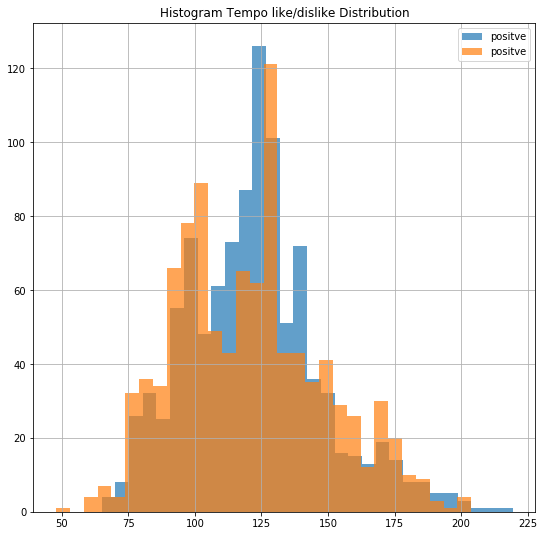

In [10]:
"""
structure of the data
-most songs liked had tempo in 125 range.

"""
pos_temp = train_df[train_df['target']==1]['tempo']    #songs user liked
neg_temp = train_df[train_df['target']==0]['tempo']    #didn't like song

plt.figure(figsize=(9,9))
plt.title('Histogram Tempo like/dislike Distribution')
pos_temp.hist(alpha=0.7, bins=30, label='positve')  #hisgram is for songs user liked
neg_temp.hist(alpha=0.7, bins=30, label='positve')  #hisgram is for songs user didn't like
plt.legend()

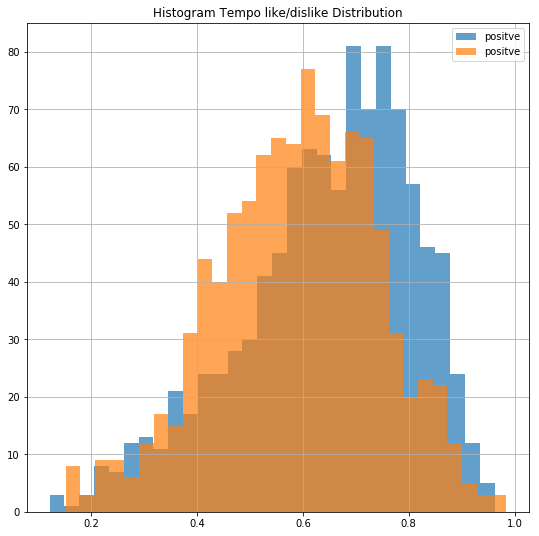

In [11]:
"""
-there's a bias towrds dislking songs with a lower danceability index
-prefernce for songs with higher danceability index.

"""

pos_dance = train_df[train_df['target']==1]['danceability']    #songs user liked
neg_dance = train_df[train_df['target']==0]['danceability']    #didn't like song

plt.figure(figsize=(9,9))
plt.title('Histogram Tempo like/dislike Distribution')
pos_dance.hist(alpha=0.7, bins=30, label='positve')  #hisgram is for songs user liked
neg_dance.hist(alpha=0.7, bins=30, label='positve')  #hisgram is for songs user didn't like
plt.legend()

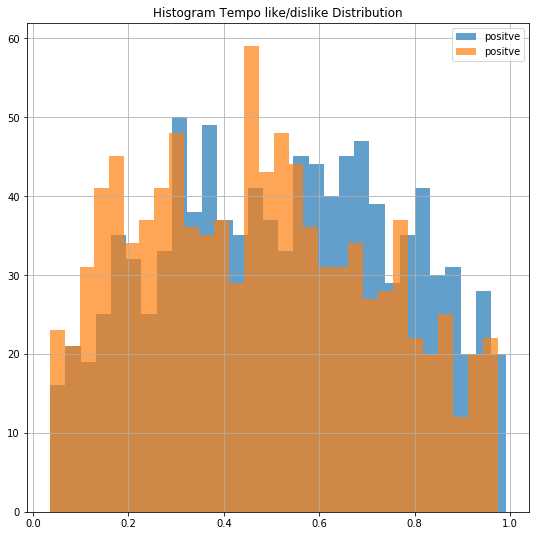

In [12]:
"""
valence-how vs how negative a song sounds

"""

pos_valence = train_df[train_df['target']==1]['valence']    #songs user liked
neg_valence = train_df[train_df['target']==0]['valence']    #didn't like song

plt.figure(figsize=(9,9))
plt.title('Histogram Tempo like/dislike Distribution')
pos_valence.hist(alpha=0.7, bins=30, label='positve')  #hisgram is for songs user liked
neg_valence.hist(alpha=0.7, bins=30, label='positve')  #hisgram is for songs user didn't like
plt.legend()

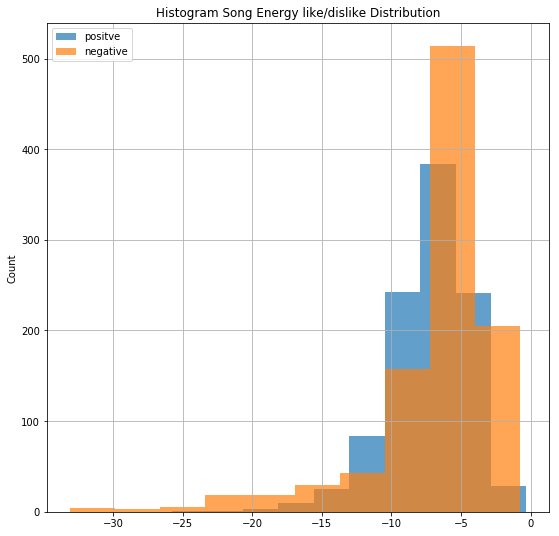

In [13]:
"""
-big spike in dislike for songs at exrteme end of loudness
"""

pos_loud = train_df[train_df['target']==1]['loudness']    #songs user liked
neg_loud = train_df[train_df['target']==0]['loudness']    #didn't like song

plt.figure(figsize=(9,9))
plt.title('Histogram Song Energy like/dislike Distribution')
pos_loud.hist(alpha=0.7, bins=10, label='positve')  #hisgram is for songs user liked
neg_loud.hist(alpha=0.7, bins=10, label='negative')  #hisgram is for songs user didn't like
plt.ylabel('Count')
plt.legend()

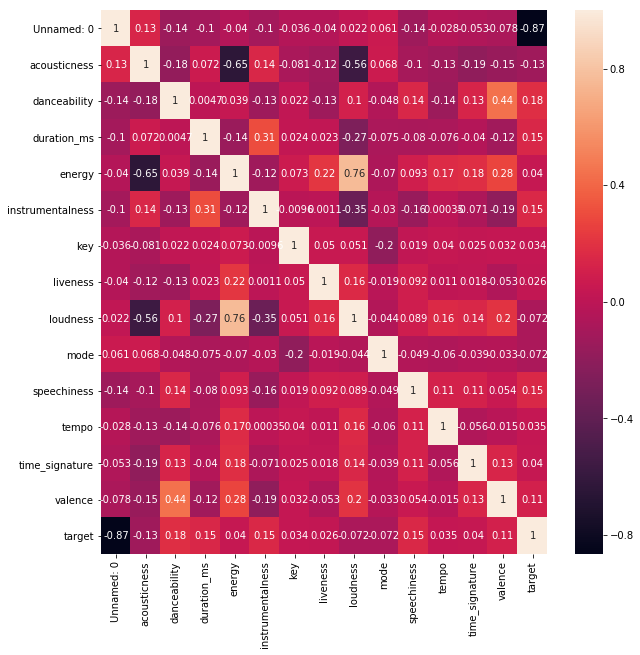

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), annot=True);

/Users/davidtorres/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/davidtorres/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/davidtorres/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/davidtorres/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, d

<Figure size 720x720 with 0 Axes>

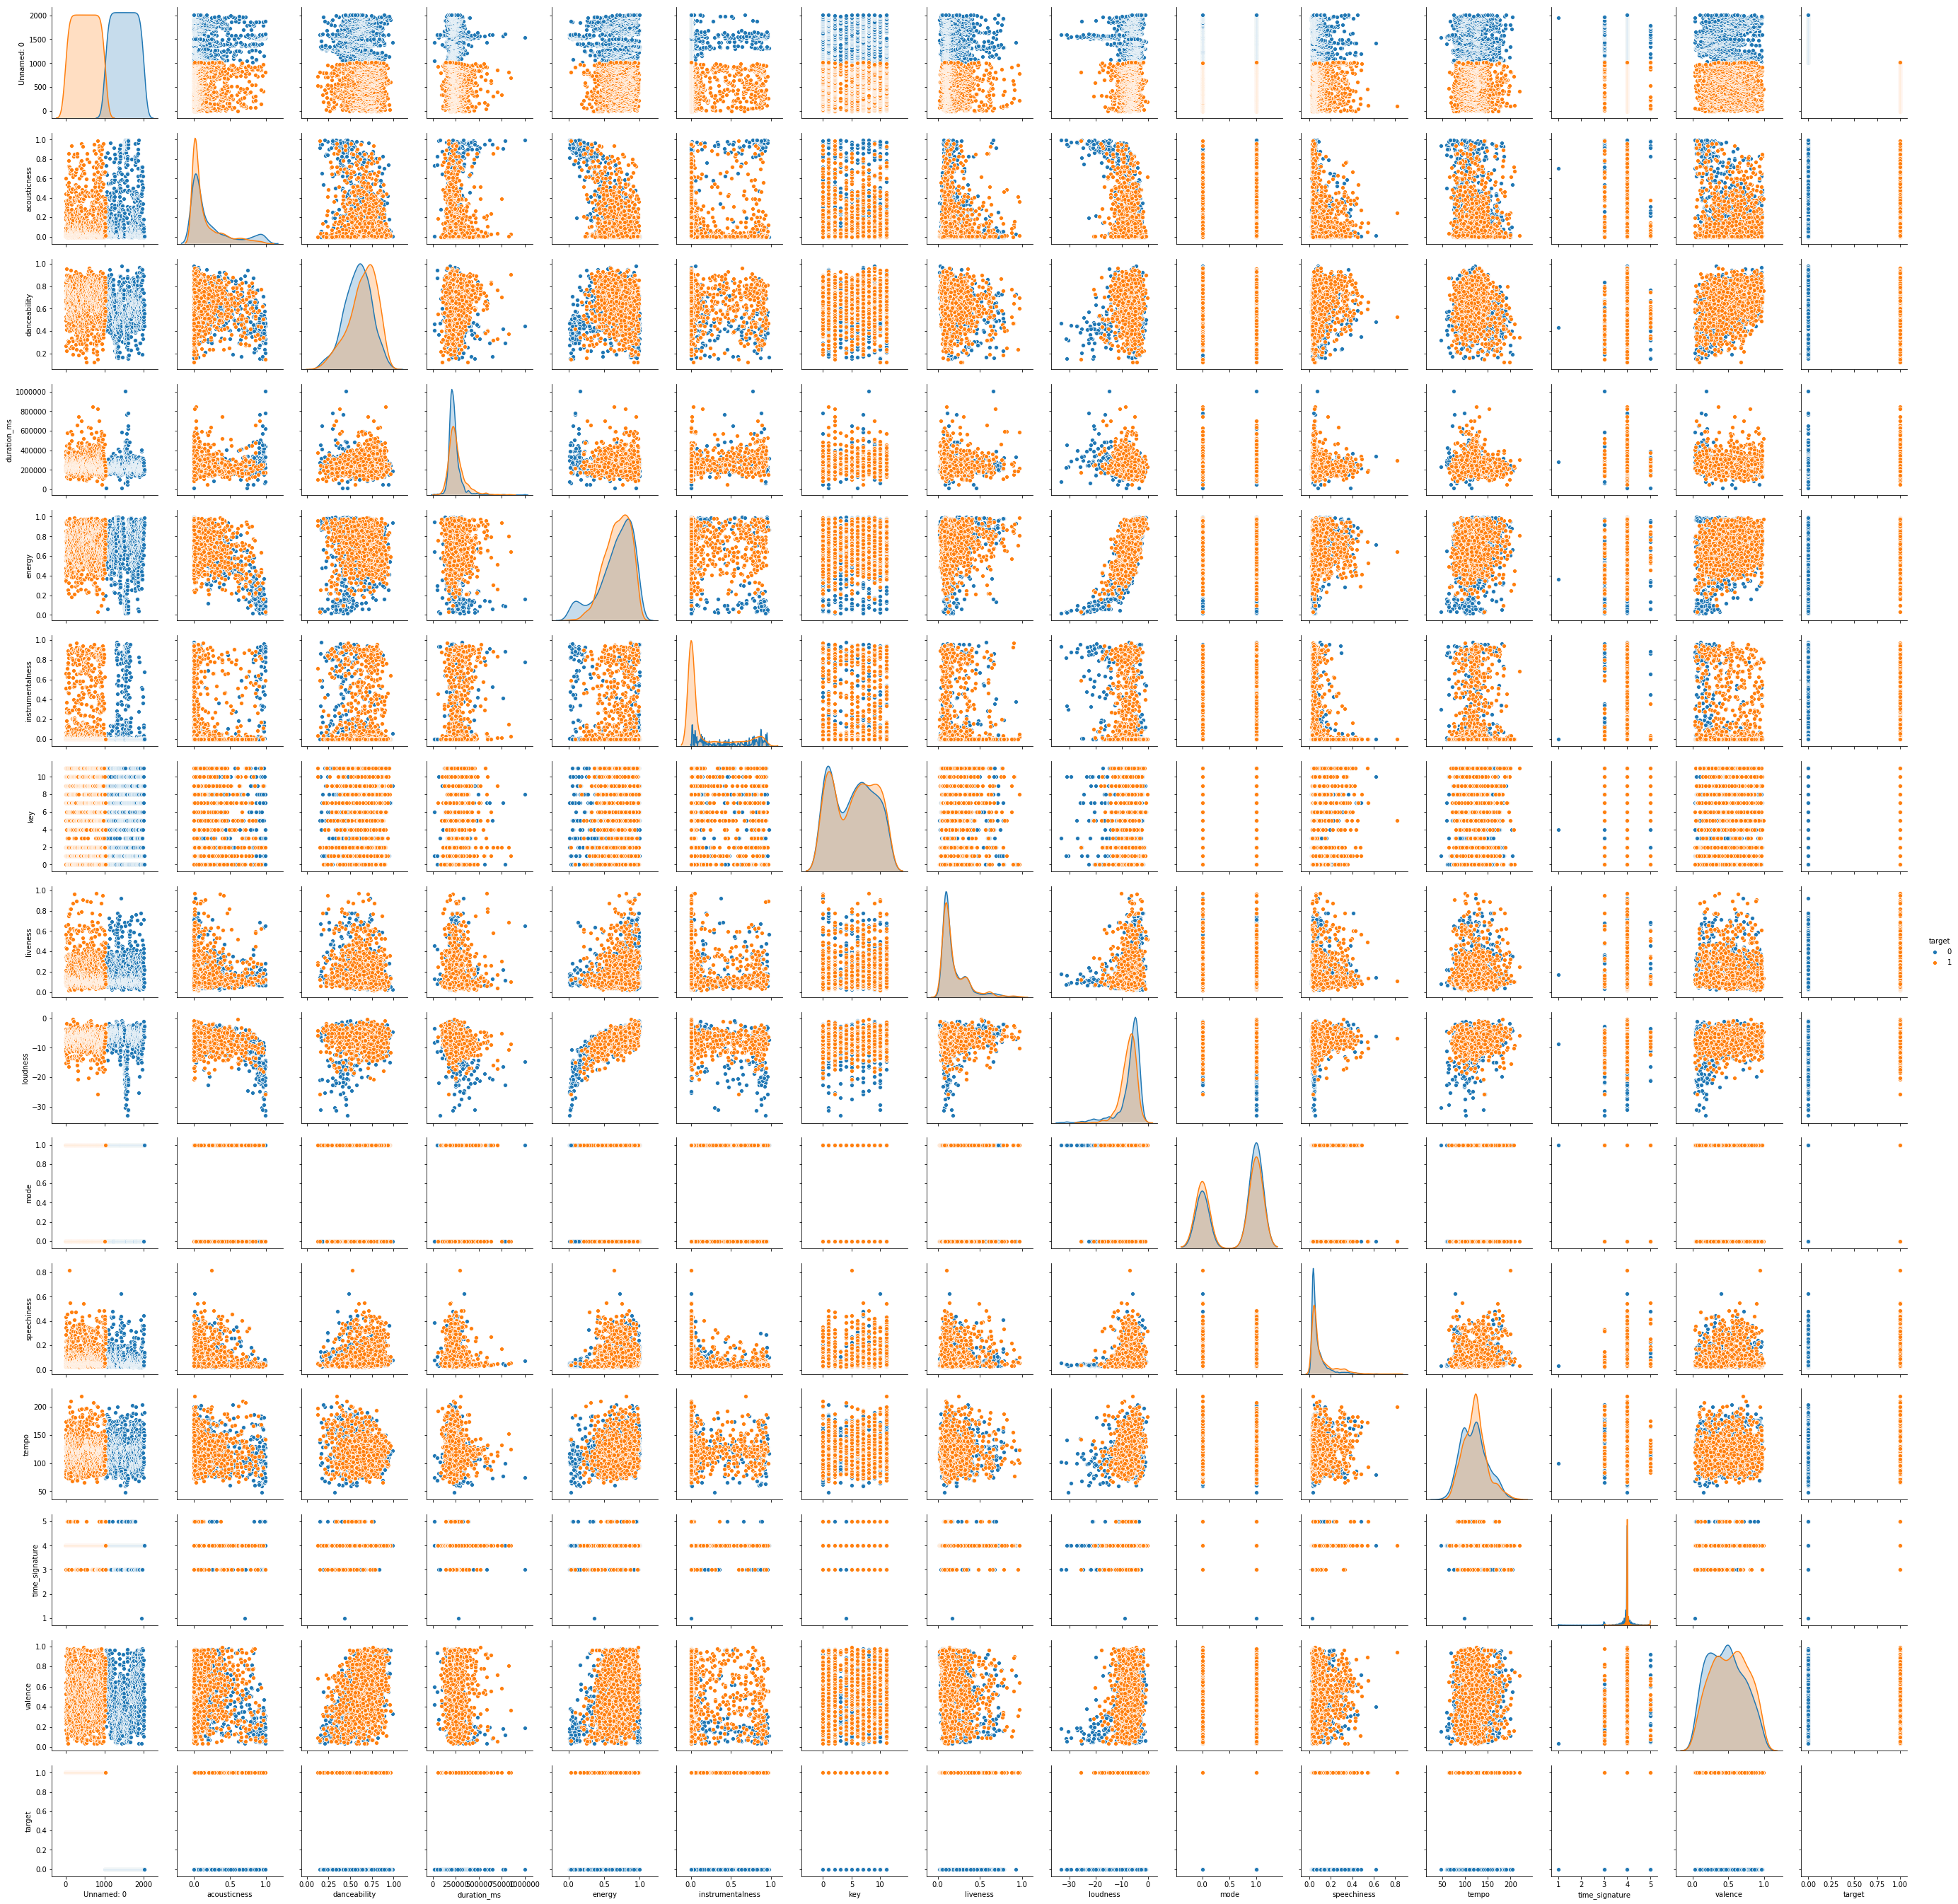

In [15]:
plt.figure(figsize=(10,10))
sns.pairplot(train_df, hue='target');

Decision Tree Classifier

In [16]:
c = DecisionTreeClassifier(min_samples_split=100)

In [17]:
train_df.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [18]:
y_test

621     1
1427    0
104     1
1302    0
1384    0
161     1
183     1
100     1
1321    0
749     1
1214    0
1572    0
256     1
459     1
1443    0
995     1
1696    0
198     1
1329    0
1491    0
467     1
670     1
1876    0
775     1
55      1
485     1
1322    0
1990    0
1355    0
1168    0
       ..
1776    0
1577    0
1018    1
1336    0
1656    0
1504    0
2009    0
1092    0
1014    1
16      1
148     1
1054    0
1965    0
20      1
1535    0
1749    0
34      1
336     1
1084    0
492     1
45      1
466     1
488     1
745     1
1609    0
946     1
1379    0
1498    0
1847    0
742     1
Name: target, Length: 606, dtype: int64

In [19]:
c.fit(X_train, y_train)
y_pred = c.predict(X_test)

In [20]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,

In [21]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred) 
print('Accuracy Score is: ', score)

Accuracy Score is:  0.731023102310231


KNN

In [22]:
"""
-for KNN the scale of variable matters alot
-any variables that are on a larger scale will have a larger effect on distance between observations.
-w/knn classifier want to try and standardize everything to the same scale
-need to drop target. Don't put targt in scaler
"""
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
#use scaler object to do a transformation
scaled_features = scaler.transform(X)

In [25]:
"""
-above, values are not always close to each other
-scaled values of above features
"""
scaled_features

array([[-0.68246675,  1.33287384, -0.50885114, ...,  1.06670945,
         0.12404825, -0.8530387 ],
       [ 0.04389718,  0.77382959,  0.98371569, ...,  1.4423234 ,
         0.12404825,  0.36896951],
       [-0.5893629 ,  1.36393186, -0.73936184, ..., -1.74516635,
         0.12404825, -1.31028018],
       ...,
       [-0.68873779,  0.11539969, -0.47712893, ...,  1.0674591 ,
         0.12404825, -0.1085039 ],
       [-0.71539935, -0.38152853, -0.74066733, ...,  1.06479783,
         0.12404825,  0.51059297],
       [-0.71089805, -1.07101644, -0.50982721, ...,  2.56418006,
         0.12404825, -0.38365806]])

In [26]:
df_feat = pd.DataFrame(scaled_features, columns=X.columns)

In [27]:
"""
-now we have standardized scale of data
-K Nearest Neighbors depends on the distance of each feature
"""
df_feat.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.916446,-0.166291,-0.454530,0.795738,3.763084,1.066709,0.124048,-0.853039
1,0.043897,0.773830,0.983716,-1.534468,-0.465683,-1.190619,-0.346454,-0.881573,0.795738,-0.147529,1.442323,0.124048,0.368970
2,-0.589363,1.363932,-0.739362,-1.282352,-0.487200,-0.916446,-0.204897,-0.016586,0.795738,2.183712,-1.745166,0.124048,-1.310280
3,1.602040,-0.772860,-0.572137,-1.634363,1.379429,-0.093928,-0.634715,-2.167220,0.795738,-0.740350,-1.316964,0.124048,-1.079636
4,-0.029201,0.370075,1.788484,-0.573574,1.386753,-0.093928,1.596735,-1.213155,-1.256696,-0.258753,1.964120,0.124048,1.647627


In [28]:
X_1 = df_feat

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=42)

In [30]:
"""
-predcit whehter someone will be in that target class or not
"""
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [32]:
"""
-predicitons of what these classes belong to
"""
pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [33]:
print('Accuracy Score: ', accuracy_score(y_test,pred))

Accuracy Score:  0.6551155115511551


Model Evaluation

In [34]:
"""
-evaluat model's performance on test data
-use confusion matrix to evalute classificaiton models
-binary classificaiton problem-like or don't like

"""

from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(confusion_matrix(y_test, pred))

[[212  84]
 [125 185]]


In [36]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.63      0.72      0.67       296
          1       0.69      0.60      0.64       310

avg / total       0.66      0.66      0.65       606



In [37]:
"""
elbow method to choose correct k value
-iterate many models using many k values and plot out error rate and see which has lowest error rate
-check every possible k value from 1 to 40

-error rate - the average of where my predictions were not equal actual test values(y_test). Take mean of that.
"""
error_rate = []

for i in range(1,40):
    knn_1 = KNeighborsClassifier(n_neighbors=i)
    knn_1.fit(X_train,y_train)
    pred_i = knn_1.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) #this is the average error rate 


Text(0,0.5,'Error Rate')

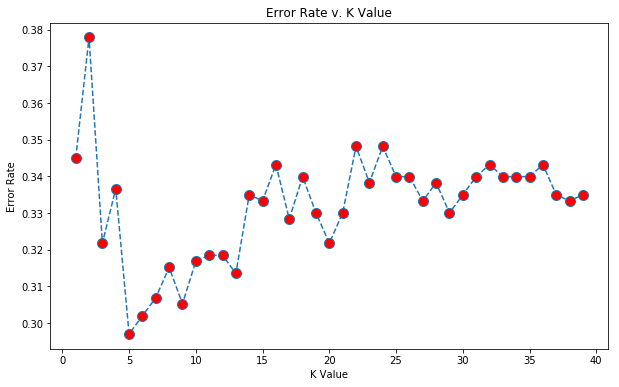

In [38]:
"""
lower error rate as you increase increase K value.
High error rate with low k value

"""

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate v. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [39]:
knn_2 = KNeighborsClassifier(n_neighbors=5)
knn_2.fit(X_train,y_train)
pred_1 = knn.predict(X_test)

In [40]:

print(confusion_matrix(y_test, pred_1))
print('---------------------')
print(classification_report(y_test,pred_1))

[[212  84]
 [125 185]]
---------------------
             precision    recall  f1-score   support

          0       0.63      0.72      0.67       296
          1       0.69      0.60      0.64       310

avg / total       0.66      0.66      0.65       606



In [41]:
"""
Sensitivity -when actual value is positive how often is the prediction correct?
  Also known as true postive or recall
all postive=TP + FN
TP/ all postive
"""

from sklearn import metrics
print(metrics.recall_score(y_test, pred_1))
print('---------')
185/ 310

0.5967741935483871
---------


0.5967741935483871

In [42]:
"""
Specificity - when actual value is negative, how often is prediciton correct?
TN / all_negative(TN + FP)

212 / 296 = 0.716
"""
212 / 296 

0.7162162162162162

In [43]:
"""
-Precision - when positove value is predicted, how often is prediction correct?

"""
print(metrics.precision_score(y_test, pred_1))

0.6877323420074349


Logistic Regression

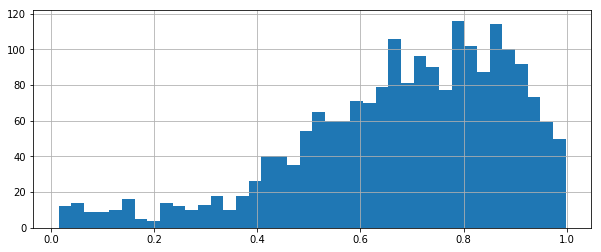

In [44]:
train_df['energy'].hist(bins=40, figsize=(10,4));

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logmod = LogisticRegression()
logmod.fit(X_train,y_train)
predictions = logmod.predict(X_test)
print(metrics.precision_score(y_test, predictions))

0.6622073578595318


In [47]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.64      0.66      0.65       296
          1       0.66      0.64      0.65       310

avg / total       0.65      0.65      0.65       606



In [48]:
print(confusion_matrix(y_test, predictions))

[[195 101]
 [112 198]]
